In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv("div_0.csv")

In [45]:
divs = len(df[(df['i'] > 0) &( df['next']=="div")])
dels = len(df[(df['i'] > 0) &(df['next']=="del")])
nbs = len(df[(df['i'] > 0) &(df['next']=="none")])
total = divs + dels + nbs

In [46]:
print (divs/total, dels/total, nbs/total, total)

0.09579870729455217 0.0909510618651893 0.8132502308402585 4332


In [47]:
def get_ratio(df, distance, time, t):
    """
    distance and time are cutoffs
    t is div/del
    """
    data = []
    for i in range(20,301, 20):
        events = df[(df['i']==i) & (df['next']==t)]
        snapshot = df[(df['i']==i)].copy()
        close = []
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))
            close.append(snapshot[(snapshot['distance']< distance) & (snapshot['distance'] >1e-6)])
        close = pd.concat(close)['id'].unique()
        data.append(df[(df['id'].isin(close)) & (df['i']== i + 20*time)].copy())
    return pd.concat(data)

In [48]:

def get_ratio_2(df, distance, time,t):
    data = []
    distances = []
    for i in range(20, 301, 20):
        events = df[(df['i']==i) & (df['next']==t)]
        snapshot = df[(df['i']==i)].copy()
        close = []
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))
            close.append(snapshot.sort_values('distance').head(7).tail(6))
            distances.append(max(snapshot.sort_values('distance').head(7).tail(6)['distance']))
        close = pd.concat(close)['id'].unique()
        data.append(df[(df['id'].isin(close)) & (df['i']== i + 20*time)].copy())
    return pd.concat(data), distances

In [49]:
data = []
for i in range(10):
    data.append(pd.read_csv(f"div_{i}.csv"))

In [50]:
div_div = []
for distance in np.linspace(0,.2,14):
    dels_t = 0
    divs_t = 0
    nbs_t = 0
    for df in data:
        d = get_ratio(df, distance, 2, "div")
        try:
            dels = d.groupby('next').count().iat[0,1]
        except:
            dels = 0
        try:
            divs = d.groupby('next').count().iat[1,1]
        except:
            divs = 0
        try:
            nbs = d.groupby('next').count().iat[2,1]
        except:
            nbs = 0
        dels_t += dels
        divs_t += divs
        nbs_t += nbs
    t = dels_t + divs_t + nbs_t
    print(t)
    if t ==0:
        t = 1
    div_div.append((divs_t/t, dels_t/t, nbs_t/t))


0
3
995
7195
12438
16513
19805
21938
23349
24109
24565
24819
24978
25073


In [51]:
data = []
for i in range(10):
    data.append(pd.read_csv(f"del_{i}.csv"))

In [52]:
del_del = []
for distance in np.linspace(0,.2,14):
    dels_t = 0
    divs_t = 0
    nbs_t = 0
    for df in data:
        d = get_ratio(df, distance, 2, "del")
        try:
            dels = d.groupby('next').count().iat[0,1]
        except:
            dels = 0
        try:
            divs = d.groupby('next').count().iat[1,1]
        except:
            divs = 0
        try:
            nbs = d.groupby('next').count().iat[2,1]
        except:
            nbs = 0
        dels_t += dels
        divs_t += divs
        nbs_t += nbs
    t = dels_t + divs_t + nbs_t
    if t ==0:
        t = 1
    del_del.append((divs_t/t, dels_t/t, nbs_t/t))

In [53]:
data = []
for i in range(10):
    data.append(pd.read_csv(f"both_{i}.csv"))


In [54]:
both_div = []
for distance in np.linspace(0,.2,14):
    dels_t = 0
    divs_t = 0
    nbs_t = 0
    for df in data:
        d = get_ratio(df, distance, 2, "div")
        try:
            dels = d.groupby('next').count().iat[0,1]
        except:
            dels = 0
        try:
            divs = d.groupby('next').count().iat[1,1]
        except:
            divs = 0
        try:
            nbs = d.groupby('next').count().iat[2,1]
        except:
            nbs = 0
        dels_t += dels
        divs_t += divs
        nbs_t += nbs
    t = dels_t + divs_t + nbs_t
    if t ==0:
        t = 1
    both_div.append((divs_t/t, dels_t/t, nbs_t/t))

In [55]:
both_del = []
for distance in np.linspace(0,.2,14):
    dels_t = 0
    divs_t = 0
    nbs_t = 0
    for df in data:
        d = get_ratio(df, distance, 2, "del")
        try:
            dels = d.groupby('next').count().iat[0,1]
        except:
            dels = 0
        try:
            divs = d.groupby('next').count().iat[1,1]
        except:
            divs = 0
        try:
            nbs = d.groupby('next').count().iat[2,1]
        except:
            nbs = 0
        dels_t += dels
        divs_t += divs
        nbs_t += nbs
    t = dels_t + divs_t + nbs_t
    if t ==0:
        t = 1
    both_del.append((divs_t/t, dels_t/t, nbs_t/t))

In [56]:
import matplotlib.pyplot as plt

In [57]:
np.arange(0,.2,14)

array([0.])

In [58]:
div_div

[(0.0, 0.0, 0.0),
 (0.3333333333333333, 0.6666666666666666, 0.0),
 (0.12261306532663317, 0.16381909547738693, 0.7135678391959799),
 (0.12244614315496873, 0.17303683113273105, 0.7045170257123002),
 (0.12349252291365172, 0.17462614568258564, 0.7018813314037626),
 (0.12263065463574153, 0.1658087567371162, 0.7115605886271422),
 (0.12451401161322899, 0.15485988386771019, 0.7206261045190608),
 (0.12507977026164646, 0.14641261737624214, 0.7285076123621114),
 (0.12574414321812497, 0.14086256370722514, 0.7333932930746498),
 (0.12576216350740388, 0.13803973619810028, 0.7361981002944958),
 (0.12574801546916345, 0.1366578465296153, 0.7375941380012212),
 (0.125992183407873, 0.1359039445586043, 0.7381038720335227),
 (0.12579069581231483, 0.13543918648410602, 0.7387701177035791),
 (0.12579268535875243, 0.13504566665337214, 0.7391616479878754)]

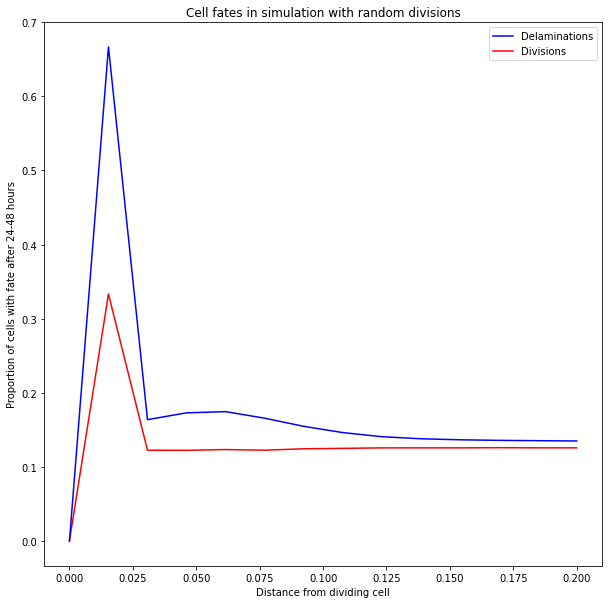

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
divs, = ax.plot(np.linspace(0,.2,14), [x[0] for x in div_div], color = 'r')
dels, = ax.plot(np.linspace(0,.2,14), [x[1] for x in div_div], color = 'b')
ax.set_xlabel("Distance from dividing cell")
ax.set_ylabel("Proportion of cells with fate after 24-48 hours") # check these numbers
ax.set_title("Cell fates in simulation with random divisions")
ax.legend([dels, divs], ["Delaminations", "Divisions"])
plt.savefig("divdiv.jpg")

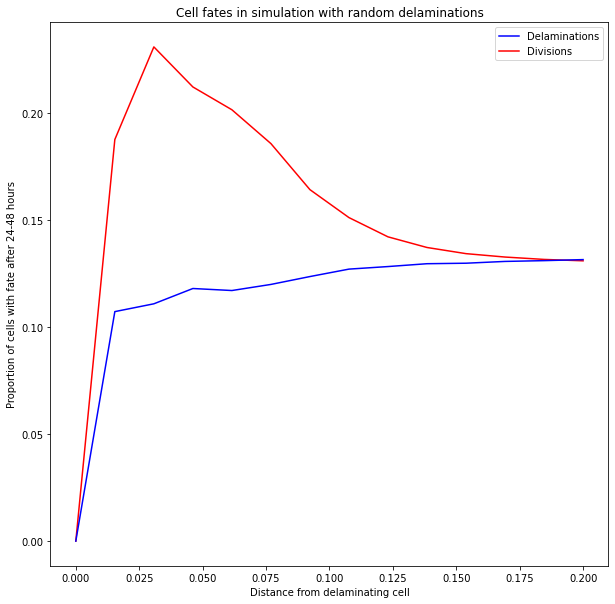

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
divs, = ax.plot(np.linspace(0,.2,14), [x[0] for x in del_del], color = 'r')
dels, = ax.plot(np.linspace(0,.2,14), [x[1] for x in del_del], color = 'b')
ax.set_xlabel("Distance from delaminating cell")
ax.set_ylabel("Proportion of cells with fate after 24-48 hours") # check these numbers
ax.set_title("Cell fates in simulation with random delaminations")
ax.legend([dels, divs], ["Delaminations", "Divisions"])
plt.savefig("deldel.jpg")

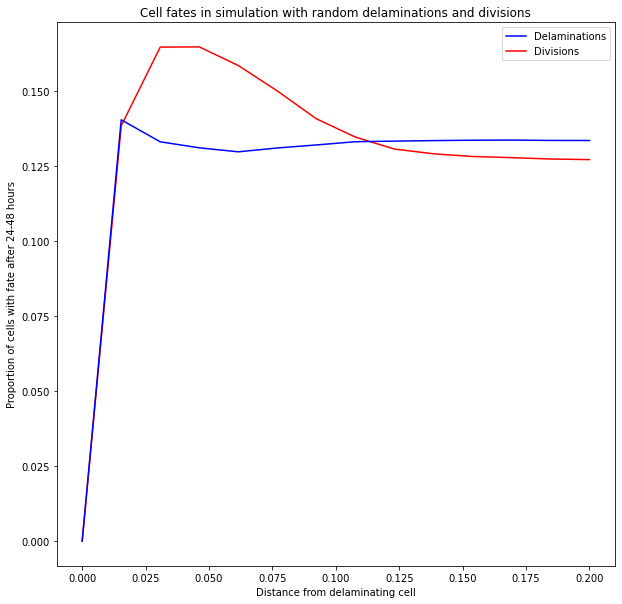

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
divs, = ax.plot(np.linspace(0,.2,14), [x[0] for x in both_del], color = 'r')
dels, = ax.plot(np.linspace(0,.2,14), [x[1] for x in both_del], color = 'b')
ax.set_xlabel("Distance from delaminating cell")
ax.set_ylabel("Proportion of cells with fate after 24-48 hours") # check these numbers
ax.set_title("Cell fates in simulation with random delaminations and divisions")
ax.legend([dels, divs], ["Delaminations", "Divisions"])
plt.savefig("bothdel.jpg")

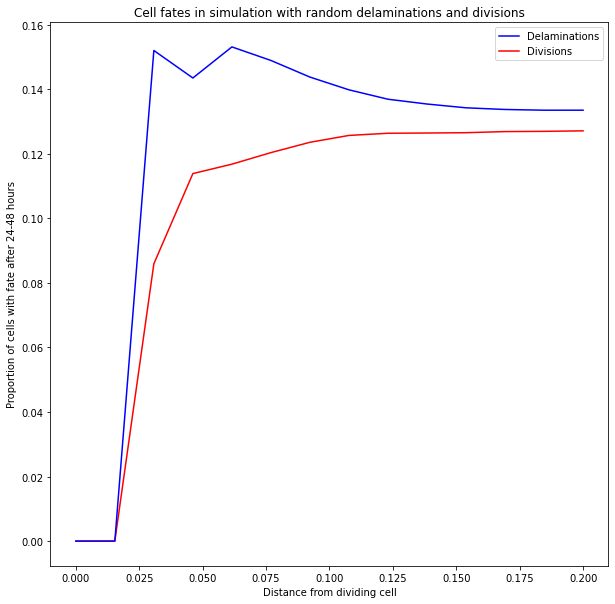

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
divs, = ax.plot(np.linspace(0,.2,14), [x[0] for x in both_div], color = 'r')
dels, = ax.plot(np.linspace(0,.2,14), [x[1] for x in both_div], color = 'b')
ax.set_xlabel("Distance from dividing cell")
ax.set_ylabel("Proportion of cells with fate after 24-48 hours") # check these numbers
ax.set_title("Cell fates in simulation with random delaminations and divisions")
ax.legend([dels, divs], ["Delaminations", "Divisions"])
plt.savefig("bothdiv.jpg")

In [185]:
# first, need to assign a probability of div to every cell. baseline is avg rate
data = []
for i in range(10):
    data.append(pd.read_csv(f"del_{i}.csv"))
combined = pd.concat(data)
divs = combined.groupby('next').count().iat[1,1]
total = len(combined)
baseline = divs/total
for df in data:
    df['prob_div'] = baseline
    df['true'] = 0
    df.loc[df['next']=="div",'true'] = 1
    df['dist'] = 1000 # dummy number

for e,df in enumerate(data):
    for i in range(20,301,20):
        events = df[(df['i']==i) & (df['next']=="del")]
        snapshot = df[(df['i']==i)].copy()
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))#.reset_index()
            snapshot.loc[snapshot['distance']==0, 'distance'] = 1000
            df = df.merge(snapshot[['i','id','distance']], on=['i','id'], how='left')
            df['distance'].fillna(1000)
            df['dist'] = pd.concat([df['dist'], df['distance']], axis=1).min(axis=1)
            del df['distance']
    data[e] = df.copy()

In [188]:
deldel_auc = []
for df in data:
    for i, d in enumerate(np.linspace(0,.2,14)):
        df.loc[df['dist'] < d, 'prob_div'] = del_del[i][0]
    fpr, tpr, threshold = roc_curve(df['true'], df['prob_div'])
    deldel_auc.append(auc(fpr,tpr))
deldel_auc = np.array(deldel_auc)

In [193]:
deldel_auc.mean()

0.5372321661299364

In [199]:
# first, need to assign a probability of div to every cell. baseline is avg rate
data = []
for i in range(10):
    data.append(pd.read_csv(f"div_{i}.csv"))
combined = pd.concat(data)
divs = combined.groupby('next').count().iat[1,1]
total = len(combined)
baseline = divs/total
for df in data:
    df['prob_div'] = baseline
    df['true'] = 0
    df.loc[df['next']=="del",'true'] = 1
    df['dist'] = 1000 # dummy number

for e,df in enumerate(data):
    for i in range(20,301,20):
        events = df[(df['i']==i) & (df['next']=="div")]
        snapshot = df[(df['i']==i)].copy()
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))#.reset_index()
            snapshot.loc[snapshot['distance']==0, 'distance'] = 1000
            df = df.merge(snapshot[['i','id','distance']], on=['i','id'], how='left')
            df['distance'].fillna(1000)
            df['dist'] = pd.concat([df['dist'], df['distance']], axis=1).min(axis=1)
            del df['distance']
    data[e] = df.copy()

In [200]:
divdiv_auc = []
for df in data:
    for i, d in enumerate(np.linspace(0,.2,14)):
        df.loc[df['dist'] < d, 'prob_div'] = div_div[i][0]
    fpr, tpr, threshold = roc_curve(df['true'], df['prob_div'])
    divdiv_auc.append(auc(fpr,tpr))
divdiv_auc = np.array(divdiv_auc)

In [201]:
divdiv_auc.mean()

0.582872247378175

In [202]:
# first, need to assign a probability of div to every cell. baseline is avg rate
data = []
for i in range(10):
    data.append(pd.read_csv(f"both_{i}.csv"))
combined = pd.concat(data)
divs = combined.groupby('next').count().iat[1,1]
total = len(combined)
baseline = divs/total
for df in data:
    df['prob_div'] = baseline
    df['true'] = 0
    df.loc[df['next']=="del",'true'] = 1
    df['dist'] = 1000 # dummy number

for e,df in enumerate(data):
    for i in range(20,301,20):
        events = df[(df['i']==i) & (df['next']=="div")]
        snapshot = df[(df['i']==i)].copy()
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))#.reset_index()
            snapshot.loc[snapshot['distance']==0, 'distance'] = 1000
            df = df.merge(snapshot[['i','id','distance']], on=['i','id'], how='left')
            df['distance'].fillna(1000)
            df['dist'] = pd.concat([df['dist'], df['distance']], axis=1).min(axis=1)
            del df['distance']
    data[e] = df.copy()

In [203]:
bothdiv_auc = []
for df in data:
    for i, d in enumerate(np.linspace(0,.2,14)):
        df.loc[df['dist'] < d, 'prob_div'] = both_div[i][0]
    fpr, tpr, threshold = roc_curve(df['true'], df['prob_div'])
    bothdiv_auc.append(auc(fpr,tpr))
bothdiv_auc = np.array(bothdiv_auc)

In [206]:
bothdiv_auc.mean()

0.5729257742951326

In [204]:
# first, need to assign a probability of div to every cell. baseline is avg rate
data = []
for i in range(10):
    data.append(pd.read_csv(f"both_{i}.csv"))
combined = pd.concat(data)
divs = combined.groupby('next').count().iat[1,1]
total = len(combined)
baseline = divs/total
for df in data:
    df['prob_div'] = baseline
    df['true'] = 0
    df.loc[df['next']=="div",'true'] = 1
    df['dist'] = 1000 # dummy number

for e,df in enumerate(data):
    for i in range(20,301,20):
        events = df[(df['i']==i) & (df['next']=="del")]
        snapshot = df[(df['i']==i)].copy()
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))#.reset_index()
            snapshot.loc[snapshot['distance']==0, 'distance'] = 1000
            df = df.merge(snapshot[['i','id','distance']], on=['i','id'], how='left')
            df['distance'].fillna(1000)
            df['dist'] = pd.concat([df['dist'], df['distance']], axis=1).min(axis=1)
            del df['distance']
    data[e] = df.copy()

In [205]:
bothdel_auc = []
for df in data:
    for i, d in enumerate(np.linspace(0,.2,14)):
        df.loc[df['dist'] < d, 'prob_div'] = both_del[i][0]
    fpr, tpr, threshold = roc_curve(df['true'], df['prob_div'])
    bothdel_auc.append(auc(fpr,tpr))
bothdel_auc = np.array(bothdel_auc)

In [207]:
bothdel_auc.mean()

0.5444930150803751

TODO: double check these numbers, but based on these: the simple model is comparable to the GNN in the simulation with both inciting actions, and significantly worse with only a single one. however, in all cases it does learn some of the patterns.

In [183]:
df[df['dist']<1000]

,Unnamed: 0,parent,next,id,i,x,y,prob_div,true,dist


In [165]:
# next, assign probabilities for the everything that changes. Will do that later

In [166]:
# for now, work with a single dataframe
df = data[0]
class_count = df['next'].value_counts()
divs = class_count['div']
nodivs = len(df) - divs
tpr, fpr = [],[]
# for threshold in np.linspace(0,1,20):
#     df['pred'] = "div"
#     df.loc[df['prob_div'] < threshold, 'pred'] = "nodiv"
#     df['tp'] = df['pred'] == df['next']
#     df['fp'] = (df['pred'] == "div")& (df['next'] != "div")
#     tp = df['tp'].sum()
#     fp = df['fp'].sum()
#     tpr.append(tp/len(df))
#     fpr.append(tp/len(df))

In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [89]:
df.loc[df['next']!='nodiv','next'] = 0
df.loc[df['next']=='div','next'] = 1

In [174]:
df['true'] = 0
df.loc[df['next']=="div",'true'] = 1

In [100]:
del_del

[(0.0, 0.0, 0.0),
 (0.1878048780487805, 0.1073170731707317, 0.7048780487804878),
 (0.23110970597533986, 0.11097059753398672, 0.6579196964906734),
 (0.21238234124353705, 0.11812276282646161, 0.6694948959300013),
 (0.2017143899325187, 0.11718037570672989, 0.6811052343607514),
 (0.1858902575587906, 0.12003079507278835, 0.694078947368421),
 (0.1643542606081628, 0.12371372412995722, 0.71193201526188),
 (0.15128805620608898, 0.12719229768410095, 0.72151964610981),
 (0.14228505259094856, 0.12838946251085592, 0.7293254848981955),
 (0.13730569948186527, 0.12971872686898595, 0.7329755736491488),
 (0.13442682210473997, 0.12995345894898558, 0.7356197189462744),
 (0.13283542277940785, 0.13079043300435672, 0.7363741442162355),
 (0.13172729674975778, 0.13115476085616137, 0.7371179423940809),
 (0.13107072476461573, 0.13164002627545435, 0.73728924895993)]

In [101]:
np.linspace(0,.2,14)

array([0.        , 0.01538462, 0.03076923, 0.04615385, 0.06153846,
       0.07692308, 0.09230769, 0.10769231, 0.12307692, 0.13846154,
       0.15384615, 0.16923077, 0.18461538, 0.2       ])

In [105]:
df

,Unnamed: 0,parent,next,id,i,x,y,prob_div,true,dist
0,0,none,none,cbd1bc8c-a440-11ec-a386-0242ac110002,0,0.314488,0.356626,0.093035,0,1000
1,1,none,none,cbd1ca2e-a440-11ec-a386-0242ac110002,0,0.484421,0.759583,0.093035,0,1000
2,2,none,none,cbd20d36-a440-11ec-a386-0242ac110002,0,0.215891,0.205842,0.093035,0,1000
3,3,none,none,cbd21c5e-a440-11ec-a386-0242ac110002,0,0.629827,0.426554,0.093035,0,1000
4,4,none,none,cbd2666e-a440-11ec-a386-0242ac110002,0,0.415513,0.582253,0.093035,0,1000
...,...,...,...,...,...,...,...,...,...,...
4060,264,none,none,ebba79d0-a440-11ec-a386-0242ac110002,299,0.823300,0.175563,0.093035,0,1000
4061,265,none,none,ebc3727e-a440-11ec-a386-0242ac110002,300,0.682235,0.723395,0.093035,0,1000
4062,266,none,none,ebc38d2c-a440-11ec-a386-0242ac110002,300,0.199808,0.759743,0.093035,0,1000
4063,267,none,none,ebc399a2-a440-11ec-a386-0242ac110002,300,0.491955,0.529859,0.093035,0,1000


In [167]:
# now, find the min distance from 40 timesteps ago for each point.
df['dist'] = 1000 # dummy number
for i in range(20,301,20):
    events = df[(df['i']==i) & (df['next']=="del")]
    snapshot = df[(df['i']==i)].copy()
    for j in range(len(events)):
        snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,5],2) + np.power(snapshot['y'] - events.iat[j,6],2))#.reset_index()
        snapshot.loc[snapshot['distance']==0, 'distance'] = 1000
        df = df.merge(snapshot[['i','id','distance']], on=['i','id'], how='left')
        df['distance'].fillna(1000)
        df['dist'] = pd.concat([df['dist'], df['distance']], axis=1).min(axis=1)
        del df['distance']

In [169]:
del_del

[(0.0, 0.0, 0.0),
 (0.1878048780487805, 0.1073170731707317, 0.7048780487804878),
 (0.23110970597533986, 0.11097059753398672, 0.6579196964906734),
 (0.21238234124353705, 0.11812276282646161, 0.6694948959300013),
 (0.2017143899325187, 0.11718037570672989, 0.6811052343607514),
 (0.1858902575587906, 0.12003079507278835, 0.694078947368421),
 (0.1643542606081628, 0.12371372412995722, 0.71193201526188),
 (0.15128805620608898, 0.12719229768410095, 0.72151964610981),
 (0.14228505259094856, 0.12838946251085592, 0.7293254848981955),
 (0.13730569948186527, 0.12971872686898595, 0.7329755736491488),
 (0.13442682210473997, 0.12995345894898558, 0.7356197189462744),
 (0.13283542277940785, 0.13079043300435672, 0.7363741442162355),
 (0.13172729674975778, 0.13115476085616137, 0.7371179423940809),
 (0.13107072476461573, 0.13164002627545435, 0.73728924895993)]

In [170]:
np.linspace(0,.2,14)

array([0.        , 0.01538462, 0.03076923, 0.04615385, 0.06153846,
       0.07692308, 0.09230769, 0.10769231, 0.12307692, 0.13846154,
       0.15384615, 0.16923077, 0.18461538, 0.2       ])

In [171]:
for i, d in enumerate(np.linspace(0,.2,14)):
    df.loc[df['dist'] < d, 'prob_div'] = del_del[i][0]

In [173]:
df

,Unnamed: 0,parent,next,id,i,x,y,prob_div,dist
0,0,none,none,cd2b93c0-a3f8-11ec-a386-0242ac110002,0,0.562501,0.686052,0.093035,1000.000000
1,1,none,none,cd2bf2ca-a3f8-11ec-a386-0242ac110002,0,0.387634,0.717464,0.093035,1000.000000
2,2,none,none,cd2c61a6-a3f8-11ec-a386-0242ac110002,0,0.237356,0.179582,0.093035,1000.000000
3,3,none,none,cd2c63f4-a3f8-11ec-a386-0242ac110002,0,0.272273,0.491445,0.093035,1000.000000
4,4,none,none,cd2c666a-a3f8-11ec-a386-0242ac110002,0,0.617897,0.175854,0.093035,1000.000000
...,...,...,...,...,...,...,...,...,...
4095,251,none,none,ec3f68d6-a3f8-11ec-a386-0242ac110002,300,0.601698,0.317893,0.131071,0.101928
4096,252,none,none,ec595656-a3f8-11ec-a386-0242ac110002,300,0.576340,0.420883,0.131071,0.026314
4097,253,none,none,ec596cc2-a3f8-11ec-a386-0242ac110002,300,0.323637,0.472052,0.131071,0.034546
4098,254,none,none,ec596df8-a3f8-11ec-a386-0242ac110002,300,0.423285,0.611751,0.131071,0.069813


In [175]:
fpr, tpr, threshold = roc_curve(df['true'], df['prob_div'])

In [176]:
auc(fpr,tpr)

0.5507840531933978

Next: get the average AUC scores for all four of the experiments that I also have graphs for
Then write up stuff for another hour or so

Then work on the Hawkes process model

In [391]:
a[a['id']=="3614e848-a442-11ec-a386-0242ac110002"]

,Unnamed: 0,parent,next,id,i,x,y
485,1,none,div,3614e848-a442-11ec-a386-0242ac110002,40,0.649290,0.741986
1544,0,none,none,3614e848-a442-11ec-a386-0242ac110002,120,0.637485,0.765026
1805,0,none,none,3614e848-a442-11ec-a386-0242ac110002,140,0.629955,0.755937
2317,0,3bd7f1da-a442-11ec-a386-0242ac110002,del,3614e848-a442-11ec-a386-0242ac110002,180,0.630599,0.750652


Basically my idea with the AUC score is that you can look at the min distance to a div/del and get the probability based on that (where it goes to baseline probability if no distance from 2 timesteps ago was recorded). basically as simple as it can possibly get. Then, should be able to set tp ratio and get the score somehow?

If that doesn't give a score above .5, then there are some modifications we can make to make it better:
- baseline will actually be lower than .1 to avg out with the higher than .1 with history
- can switch probabilities to min distance rather than looking at every single cell (not actually sure what's going on here but that might be a thing)

But hopefully it just gives something above .5 that's usable, and then I can say look you can get at least something out of this.

Could also look at probabilities over the next 2 timesteps, etc. Lot of options but if my intuition is correct, because we have a good peak, we should be able to get >.5 with the simplest model. 

In [392]:
a.groupby('next').count()

,Unnamed: 0,parent,id,i,x,y
next,,,,,,
del,157,157,157,157,157,157
div,154,154,154,154,154,154
none,1080,1080,1080,1080,1080,1080


In [102]:
df

,Unnamed: 0,parent,next,id,i,x,y,prob_div,true
0,0,none,none,cbd1bc8c-a440-11ec-a386-0242ac110002,0,0.314488,0.356626,0.093035,0
1,1,none,none,cbd1ca2e-a440-11ec-a386-0242ac110002,0,0.484421,0.759583,0.093035,0
2,2,none,none,cbd20d36-a440-11ec-a386-0242ac110002,0,0.215891,0.205842,0.093035,0
3,3,none,none,cbd21c5e-a440-11ec-a386-0242ac110002,0,0.629827,0.426554,0.093035,0
4,4,none,none,cbd2666e-a440-11ec-a386-0242ac110002,0,0.415513,0.582253,0.093035,0
...,...,...,...,...,...,...,...,...,...
4060,264,none,none,ebba79d0-a440-11ec-a386-0242ac110002,299,0.823300,0.175563,0.093035,0
4061,265,none,none,ebc3727e-a440-11ec-a386-0242ac110002,300,0.682235,0.723395,0.093035,0
4062,266,none,none,ebc38d2c-a440-11ec-a386-0242ac110002,300,0.199808,0.759743,0.093035,0
4063,267,none,none,ebc399a2-a440-11ec-a386-0242ac110002,300,0.491955,0.529859,0.093035,0


In [375]:
d=np.array(d)
print(d.mean(), d.var())

0.06255128822554372 7.358330861973458e-05


In [358]:
snapshot = df[df['i']==20].copy()

In [312]:
dels = df[(df['i']==20) & (df['next']=="del")]

In [313]:
snapshot['distances'] = np.sqrt(np.power(dels.iat[3,5]-snapshot['x'],2) + np.power(dels.iat[3,6] - snapshot['y'],2))

In [314]:
close = snapshot.sort_values('distances').head(7).tail(6)['id']

In [318]:
df[(df['i']==100) & (df['id'].isin(close))]

,Unnamed: 0,parent,next,id,i,x,y
1259,9,none,none,cd2f38d6-a3f8-11ec-a386-0242ac110002,100,0.717097,0.511433
1315,65,none,none,d9fca04e-a3f8-11ec-a386-0242ac110002,100,0.752177,0.513888
1359,109,none,none,dc3b3cf8-a3f8-11ec-a386-0242ac110002,100,0.715231,0.475929
1382,132,none,none,dd033564-a3f8-11ec-a386-0242ac110002,100,0.741069,0.557672


0.8036918947379584

Thought experiment. Why would new cells be more likely to have no behavior? actually that does make sense-- they can't have any behavior for at least a couple timesteps, which could alter the ratios a little bit. 

Then, maybe just take a closer look at the numbers? Is there a trend that I'm just not really seeing that is actually there, and just less noticeable than I would like? 

Plot: the change over time with fixed distance, change over distance with fixed time

Also compare more directly the ratios for div and del. those will be useful plots anyway, even if there's another bug to catch

In [227]:
dels = df[(df['i']==60) & (df['next']=="del")]

In [228]:
dels

,Unnamed: 0,next,id,i,x,y
743,23,del,9f04bef8-a1fb-11ec-babe-0242ac110002,60,0.746027,0.273514
749,29,del,a7de3eb4-a1fb-11ec-babe-0242ac110002,60,0.438373,0.576721
764,44,del,a87f430e-a1fb-11ec-babe-0242ac110002,60,0.303725,0.192463
783,63,del,aab3ffa2-a1fb-11ec-babe-0242ac110002,60,0.665872,0.701557
792,72,del,ab268e1e-a1fb-11ec-babe-0242ac110002,60,0.705648,0.687614
793,73,del,ab3dd952-a1fb-11ec-babe-0242ac110002,60,0.751949,0.350613
799,79,del,ab733958-a1fb-11ec-babe-0242ac110002,60,0.487694,0.284364
807,87,del,abee262c-a1fb-11ec-babe-0242ac110002,60,0.504245,0.713132
810,90,del,abf5cbc0-a1fb-11ec-babe-0242ac110002,60,0.328455,0.814133
821,101,del,ac798460-a1fb-11ec-babe-0242ac110002,60,0.636679,0.593010


In [230]:
snapshot = df[df['i']==60].copy()

In [231]:
snapshot['distances'] = np.sqrt(np.power(dels.iat[3,4]-snapshot['x'],2) + np.power(dels.iat[3,5] - snapshot['y'],2))

In [232]:
close = snapshot.sort_values('distances').head(7).tail(6)['id']

In [233]:
df[(df['i']==120) & (df['id'].isin(close))]

,Unnamed: 0,next,id,i,x,y
1501,14,none,9f0475a6-a1fb-11ec-babe-0242ac110002,120,0.623021,0.671477
1542,55,del,abee2bb8-a1fb-11ec-babe-0242ac110002,120,0.769906,0.741090
1584,97,none,aea3b47c-a1fb-11ec-babe-0242ac110002,120,0.624837,0.716606
1605,118,del,af73d594-a1fb-11ec-babe-0242ac110002,120,0.704659,0.639523
1653,166,none,b1588918-a1fb-11ec-babe-0242ac110002,120,0.700129,0.748727


In [234]:
def get_ratio(df, distance, time, t):
    """
    distance and time are cutoffs
    t is div/del
    """
    data = []
    for i in range(20,301, 20):
        events = df[(df['i']==i) & (df['next']==t)]
        snapshot = df[(df['i']==i)].copy()
        close = []
        for j in range(len(events)):
            snapshot['distance'] = np.sqrt(np.power(snapshot['x'] - events.iat[j,4],2) + np.power(snapshot['y'] - events.iat[j,5],2))
            close.append(snapshot[(snapshot['distance']< distance) & (snapshot['distance'] >1e-6)])
        close = pd.concat(close)['id'].unique()
        data.append(df[(df['id'].isin(close)) & (df['i']== i + 20*time)].copy())
    return pd.concat(data)

In [235]:
far = set(df['id'])
print(len(far))
for j in range(len(dels)):
    snapshot['distance'] = np.sqrt(np.power(dels.iat[j,4]-snapshot['x'],2) + np.power(dels.iat[j,5] - snapshot['y'],2))
    close = set(snapshot.sort_values('distance').head(7)['id'])
    far -= close

679


In [236]:
len(far)

576

In [237]:
len(df[(df['id'].isin(far)) & (df['i']==80) & (df['next']=="div")]) + len(df[(df['id'].isin(far)) & (df['i']==60) & (df['next']=="div")])

19

if close and far aren't significantly different, there has to be a way that I am simulating things incorrectly

In [238]:
close = set(df['id']) - far
len(df[(df['id'].isin(close)) & (df['i']==80) & (df['next']=="div")]) + len(df[(df['id'].isin(close)) & (df['i']==60) & (df['next']=="div")])

20